In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip -qo '/content/drive/MyDrive/citizens_appeals/Messagess to technical support dataset.zip' -d '/content/drive/MyDrive/citizens_appeals/'

In [ ]:
!pip install autokeras==1.1.0 tensorflow==2.15.1 keras-nlp==0.5.1

In [ ]:
# Библиотека матричного вычисления
import numpy as np
# Библиотека для работы с данными
import pandas as pd
# Библиотека для работы с регулярными выражениями
import re
# Библиотека для работы с фреймворком TensorFlow
import tensorflow as tf
# Библиотека AutoML autokeras
import autokeras as ak
# Библиотеки для построения графиков и их стилизации
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Утилита для расщепления выборки
from sklearn.model_selection import train_test_split

# Необходимые метрики для построения Матрицы ошибок и отчета о классификации
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/citizens_appeals/train_data.csv', sep='|', on_bad_lines='skip')
df_test = pd.read_csv('/content/drive/MyDrive/citizens_appeals/test_data.csv', sep='|', on_bad_lines='skip')

# удаляем столбец importance
df_train.drop('importance', axis=1, inplace=True)
df_test.drop('importance', axis=1, inplace=True)
# Удаляем дубликаты
df_train.drop_duplicates(inplace = True)

df_train.head()

,utterance,request
0,"i bought a product, could I modify my fucking ...",change_order
1,"I changed my mind, what can I do to remove my ...",delete_account
2,I want to know where I cvan get a bill,get_invoice
3,tell me if my package is out for delivery,track_order
4,how to set a different shipping address up?,set_up_shipping_address


In [ ]:
X_train, X_tmp, y_train, y_tmp = train_test_split(np.array(df_train
                                                           .utterance),
                                                  np.array(df_train
                                                           .request),
                                                  test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_tmp,
                                                  y_tmp,
                                                  test_size=0.5)

print('Форма входных данных: ', X_train.shape)
print('Форма выходных меток: ', y_train.shape)
print('Пример заголовка: ', X_train[0])

Форма входных данных:  (18608,)
Форма выходных меток:  (18608,)
Пример заголовка:  i dont want my profile, can i close it?


In [ ]:
# Создание ансамбля моделей (3 наиболее подходящие к данным моделей)
clf = ak.TextClassifier(overwrite=True, max_trials=2, objective='val_accuracy')

# Обучаем 2 модели на 4-х эпохах, размер пакета подбирается автоматически
result_training = clf.fit(X_train, y_train, epochs=4, validation_data=(X_val, y_val))

Trial 2 Complete [00h 01m 14s]
val_accuracy: 0.9857071042060852

Best val_accuracy So Far: 0.9954864382743835
Total elapsed time: 00h 10m 33s
Epoch 1/4
582/582 [==============================] - 125s 214ms/step - loss: 1.0006 - accuracy: 0.7253 - val_loss: 0.0662 - val_accuracy: 0.9835
Epoch 2/4
582/582 [==============================] - 129s 222ms/step - loss: 0.0565 - accuracy: 0.9852 - val_loss: 0.0227 - val_accuracy: 0.9942
Epoch 3/4
582/582 [==============================] - 127s 219ms/step - loss: 0.0210 - accuracy: 0.9941 - val_loss: 0.0188 - val_accuracy: 0.9950
Epoch 4/4
582/582 [==============================] - 129s 222ms/step - loss: 0.0129 - accuracy: 0.9970 - val_loss: 0.0172 - val_accuracy: 0.9960


In [ ]:
# Предсказание на лучшей модели
predicted_y = clf.predict(X_test)

# Оценка лучшей модели на тестовых данных
print(clf.evaluate(X_test, y_test))

125/125 [==============================] - 14s 109ms/step - loss: 0.0217 - accuracy: 0.9937
[0.021704450249671936, 0.9937312006950378]


In [ ]:
def plot_graphs(history, key):
    # Используем библиотеку seaborn для задания стиля и цветовой схемы графика
    sns.set_style('darkgrid')
    palette = sns.color_palette('Set1')

    # Задаем размер полотна для рисования графика
    plt.figure(figsize=(12,6))

    # Отображаем график выбранного параметра
    plt.plot(history.history[key],   # данные для построения графика
             marker='o',             # использовать маркер для точек на графике
             color=palette[2],       # использовать цвет третий в палитре (нумерация с 0)
             linewidth=2.5,          # ширина линии
             label=key)              # подпись легенды

    # График для проверочной выборки
    if 'val_'+key in history.history:
        plt.plot(history.history['val_'+key], # данные для построения графика
                 marker='o',                  # использовать маркер для точек на графике
                 color=palette[4],            # использовать цвет пятый в палитре
                 linewidth=2.5,               # ширина линии
                 label='val_'+key)            # подпись легенды

    # подпись оси Х, размер шрифта - 12
    plt.xlabel("Эпоха", fontsize=12)
    # подпись оси Y, размер шрифта - 12
    plt.ylabel(key, fontsize=12)

    # подпись заголовка графика, размер шрифта - 14
    plt.title('Обучающая и проверочная выборки ('+key.title()+')', fontsize=14)

    # отображение легенды, размер шрифта - 12
    plt.legend(fontsize=12)

    # задаем сетку на графике
    plt.grid(True)

    # отрисовываем полотно со всеми графиками
    plt.show()

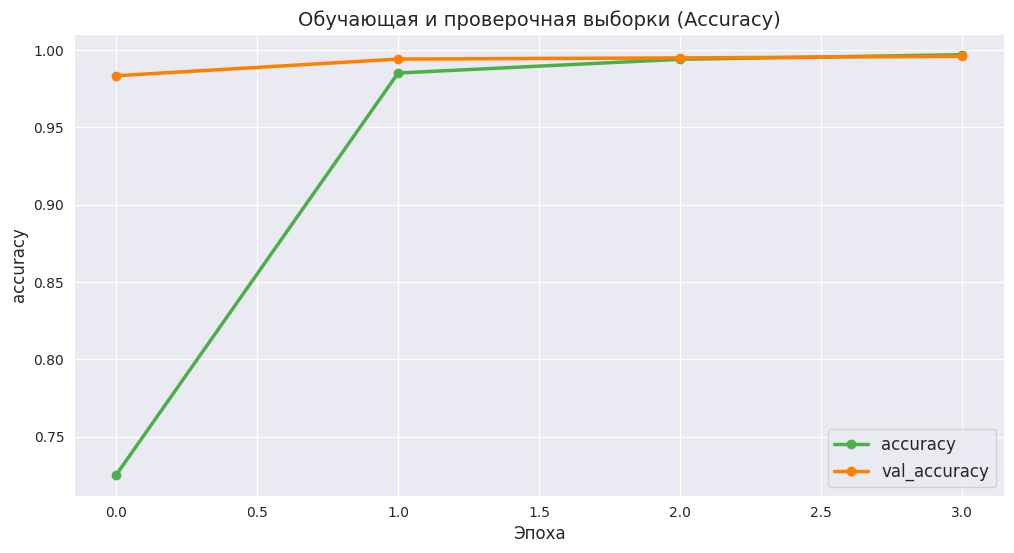

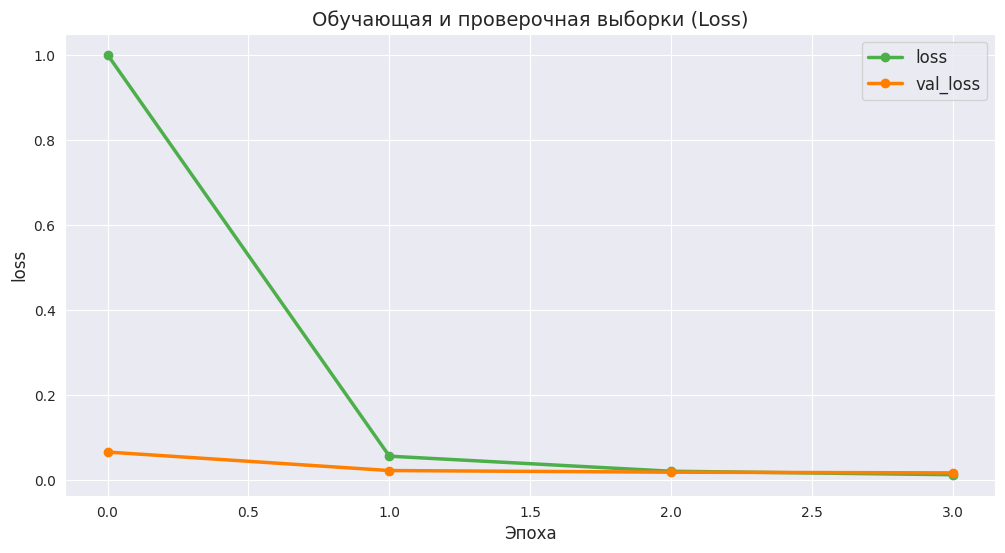

In [ ]:
# строим график точности
plot_graphs(result_training, "accuracy")

# строим график потерь
plot_graphs(result_training, "loss")

In [ ]:
print(classification_report(y_test, predicted_y))

                          precision    recall  f1-score   support

            cancel_order       0.98      1.00      0.99        42
            change_order       0.99      0.99      0.99       186
 change_shipping_address       1.00      0.98      0.99        60
  check_cancellation_fee       0.97      0.99      0.98        76
           check_invoice       1.00      0.93      0.96        42
          check_invoices       0.98      0.99      0.99       153
   check_payment_methods       1.00      0.98      0.99        83
     check_refund_policy       1.00      0.99      1.00       108
               complaint       0.99      0.99      0.99       142
contact_customer_service       1.00      1.00      1.00       332
     contact_human_agent       1.00      0.99      1.00       169
          create_account       1.00      0.99      1.00       305
          delete_account       1.00      0.99      1.00       148
        delivery_options       0.97      1.00      0.98        85
         

In [ ]:
# Входной слой обработки текста (векторизация)
input_node = ak.TextInput()
# Здесь идет подбор слоев для работы с текстом
output_node = ak.TextBlock()(input_node)
# Выходной слой должен обеспечивать классификацию
output_node = ak.ClassificationHead()(output_node)
# Собираем модель, аналогично как мы это делали для Keras functional API, используем 2 модели (max_trials=2)
clf_2 = ak.AutoModel(
    inputs=input_node, outputs=output_node, overwrite=True,  max_trials=2, objective='val_accuracy'
)
# Обучаем 2 пободранных модели на 3 эпохах
res_2 = clf_2.fit(X_train, y_train, epochs=3)

Trial 2 Complete [00h 00m 19s]
val_accuracy: 0.28950217366218567

Best val_accuracy So Far: 0.9964826703071594
Total elapsed time: 00h 00m 32s
Epoch 1/3
582/582 [==============================] - 10s 16ms/step - loss: 0.5834 - accuracy: 0.9204
Epoch 2/3
582/582 [==============================] - 7s 11ms/step - loss: 0.0780 - accuracy: 0.9916
Epoch 3/3
582/582 [==============================] - 13s 21ms/step - loss: 0.0335 - accuracy: 0.9962


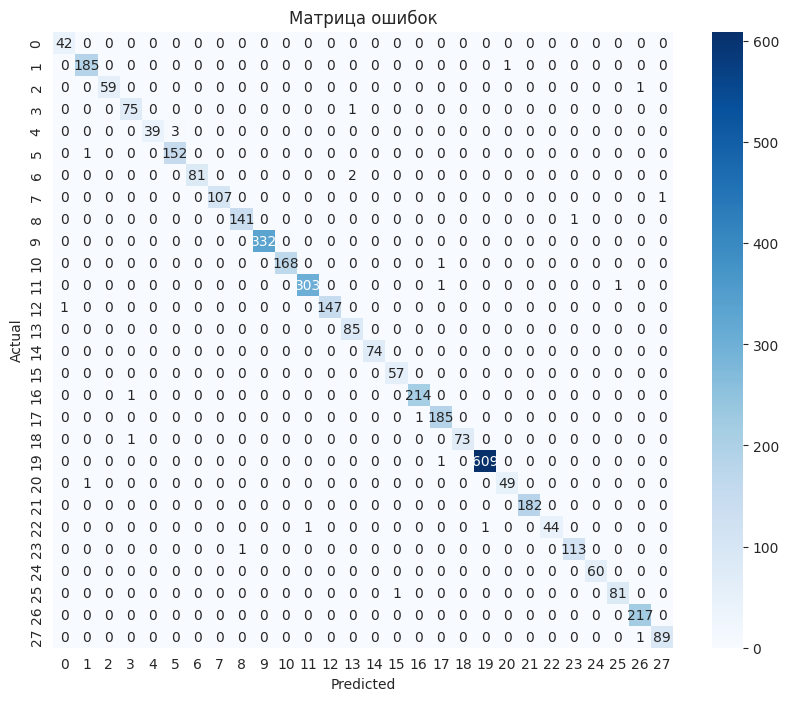

In [ ]:
conf_matrix = confusion_matrix(y_test, predicted_y)

# Визуализация матрицы ошибок
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Матрица ошибок')
plt.show()